d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Results Analysis

## Configuration

In [0]:
pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Using cached mlflow-1.18.0-py3-none-any.whl (14.2 MB)
Collecting click>=7.0
 Using cached click-8.0.1-py3-none-any.whl (97 kB)
Collecting cloudpickle
 Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Collecting Flask
 Using cached Flask-2.0.1-py3-none-any.whl (94 kB)
Collecting sqlparse>=0.3.1
 Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
Collecting sqlalchemy
 Using cached SQLAlchemy-1.4.20-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
Collecting querystring-parser
 Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting pyyaml>=5.1
 Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.5)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Processing /root/.cache/pip/wheels/69/6f/b4/2087abb1172ae32c58e366dc09746de46a72b0e9fb2c022920/prometheus_flask_exporter-0.18.2-py3-none-any.whl
Requirement already satisfied: protobuf>=3.7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.0)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Collecting gunicorn; platform_system != "Windows"
 Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
Collecting docker>=4.0.0
 Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
Collecting gitpython>=2.1.0
 Using cached GitPython-3.1.18-py3-none-any.whl (170 kB)
Processing /root/.cache/pip/wheels/9d/de/6d/ca8d461ec29e010b1267d7353d0b058819770f7680bb9360e4/alembic-1.4.1-py2.py3-none-any.whl
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Processing /root/.cache/pip/wheels/e9/f3/dc/eeff77dbc147629fa716741fc216520abbc0e15ce4b876706f/databricks_cli-0.14.3-py3-none-any.whl
Collecting packaging
 Using cached packaging-21.0-py3-none-any.whl (40 kB)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2020.12.5)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2.10)
Collecting itsdangerous>=2.0
 Using cached itsdangerous-2.0.1-py3-none-any.whl (18 kB)
Collecting Werkzeug>=2.0
 Using cached Werkzeug-2.0.1-py3-none-any.whl (288 kB)
Collecting Jinja2>=3.0
 Using cached Jinja2-3.0.1-py3-none-any.whl (133 kB)
Collecting greenlet!=0.4.17; python_version >= "3"
 Using cached greenlet-1.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (164 kB)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from querystring-parser->mlflow) (1.15.0)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas->mlflow) (2.8.1)
Collecting prometheus-client
 Using cached prometheus_client-0.11.0-py2.py3-none-any.whl (56 kB)
Requirement already satisfied: setuptools>=3.0 in /databricks/python3/lib/python3.8/site-packages (from gunicorn; platform_system != "Windows"->mlflow) (50.3.1)
Collecting websocket-client>=0.32.0
 Using cached websocket_client-1.1.0-py2.py3-none-any.whl (68 kB)
Collecting gitdb<5,>=4.0.1
 Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
Collecting python-editor>=0.3
 Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
Collecting Mako
 Using cached

In [0]:
%run ./includes/configuration

### Load Data and Scipy Libraries

In [0]:
%run ./includes/preprocessing

### Generate Subsample Sets

In [0]:
lifestyles = health_tracker_sample_agg_pd_df.lifestyle.unique()
sample_sets = generate_subsample_sets(
  health_tracker_sample_agg_pd_df,
  lifestyles
)

feature_subsets = generate_feature_subsets(health_tracker_sample_agg_pd_df)

### Run Experiments Using Decision Tree Classification On Each Feature Subset

In [0]:
from sklearn.tree import DecisionTreeClassifier

for feature_subset in feature_subsets:
  experiment_runner(
    feature_subset=feature_subset,
    model=DecisionTreeClassifier()
  )

### Retrieve Results

In [0]:
results = retrieve_results(metrics=["mean score", "std score"],
                           params=["subset"])
results

Out[14]:

,metrics.mean score,metrics.std score,params.subset
0,0.820000,0.084591,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
1,0.840000,0.085375,"['mean_active_heartrate', 'mean_resting_heartr..."
2,0.786667,0.071802,"['mean_BMI', 'mean_resting_heartrate', 'mean_V..."
3,0.846667,0.066999,"['mean_BMI', 'mean_active_heartrate', 'mean_VO..."
4,0.826667,0.095219,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
5,0.786667,0.071802,"['mean_resting_heartrate', 'mean_VO2_max']"
6,0.866667,0.078881,"['mean_active_heartrate', 'mean_VO2_max']"
7,0.853333,0.088443,"['mean_active_heartrate', 'mean_resting_heartr..."
8,0.706667,0.120000,"['mean_BMI', 'mean_VO2_max']"
9,0.806667,0.062893,"['mean_BMI', 'mean_resting_heartrate']"


### Display Correlation Plot

Out[15]:

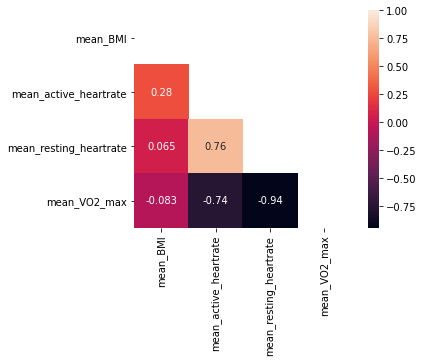

<matplotlib.axes._subplots.AxesSubplot at 0x7fa071454c70>

In [0]:
features = health_tracker_sample_agg_pd_df.select_dtypes(exclude=["object"])
corr = features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
sns.heatmap(corr, mask=mask, square=True, annot=True)

### Run Experiments Using Logistic Regression On Each Feature Subset

Use a Logistic Regression with maximum iterations of 10000 and the
penalty set to `'none'`.

In [0]:
# TODO
from sklearn.linear_model import LogisticRegression

for feature_subset in feature_subsets:
  experiment_runner(
    feature_subset=feature_subset,
    model=LogisticRegression(max_iter=1e4, penalty='none')
  )

### Retrieve Results and Display Top Performing Models by Bias

In [0]:
results = retrieve_results(metrics=["mean score", "std score"],
                           params=["model", "subset"])
results["bias"] = 1 - results["metrics.mean score"]
results["variance"] = results["metrics.std score"]**2
results.drop(["metrics.mean score", "metrics.std score"], axis=1, inplace=True)
results.sort_values("bias").head(10)

Out[17]:

,params.model,params.subset,bias,variance
21,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_VO2_max']",0.133333,0.006222
22,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.146667,0.007822
18,DecisionTreeClassifier,"['mean_BMI', 'mean_active_heartrate', 'mean_VO...",0.153333,0.004489
16,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.160000,0.007289
13,LogisticRegression,['mean_active_heartrate'],0.166667,0.007333
7,LogisticRegression,"['mean_active_heartrate', 'mean_resting_heartr...",0.166667,0.001111
19,DecisionTreeClassifier,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",0.173333,0.009067
5,LogisticRegression,"['mean_resting_heartrate', 'mean_VO2_max']",0.180000,0.008044
6,LogisticRegression,"['mean_active_heartrate', 'mean_VO2_max']",0.180000,0.006267
15,DecisionTreeClassifier,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",0.180000,0.007156


### Retrieve Results and Display Top Performing Models by Tradeoff

In [0]:
results["n_terms"] = results["params.subset"].apply(lambda x: x.count(",") + 1)
results["tradeoff"] = results["bias"]**2 + results["variance"]
results.sort_values("tradeoff").head(10)


Out[18]:

,params.model,params.subset,bias,variance,n_terms,tradeoff
21,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_VO2_max']",0.133333,0.006222,2,0.024000
18,DecisionTreeClassifier,"['mean_BMI', 'mean_active_heartrate', 'mean_VO...",0.153333,0.004489,3,0.028000
7,LogisticRegression,"['mean_active_heartrate', 'mean_resting_heartr...",0.166667,0.001111,2,0.028889
22,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.146667,0.007822,2,0.029333
16,DecisionTreeClassifier,"['mean_active_heartrate', 'mean_resting_heartr...",0.160000,0.007289,3,0.032889
13,LogisticRegression,['mean_active_heartrate'],0.166667,0.007333,1,0.035111
27,DecisionTreeClassifier,['mean_resting_heartrate'],0.186667,0.003378,1,0.038222
6,LogisticRegression,"['mean_active_heartrate', 'mean_VO2_max']",0.180000,0.006267,2,0.038667
19,DecisionTreeClassifier,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",0.173333,0.009067,3,0.039111
15,DecisionTreeClassifier,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",0.180000,0.007156,4,0.039556


### Plot Models by Tradeoff and Number of Terms

Out[19]:

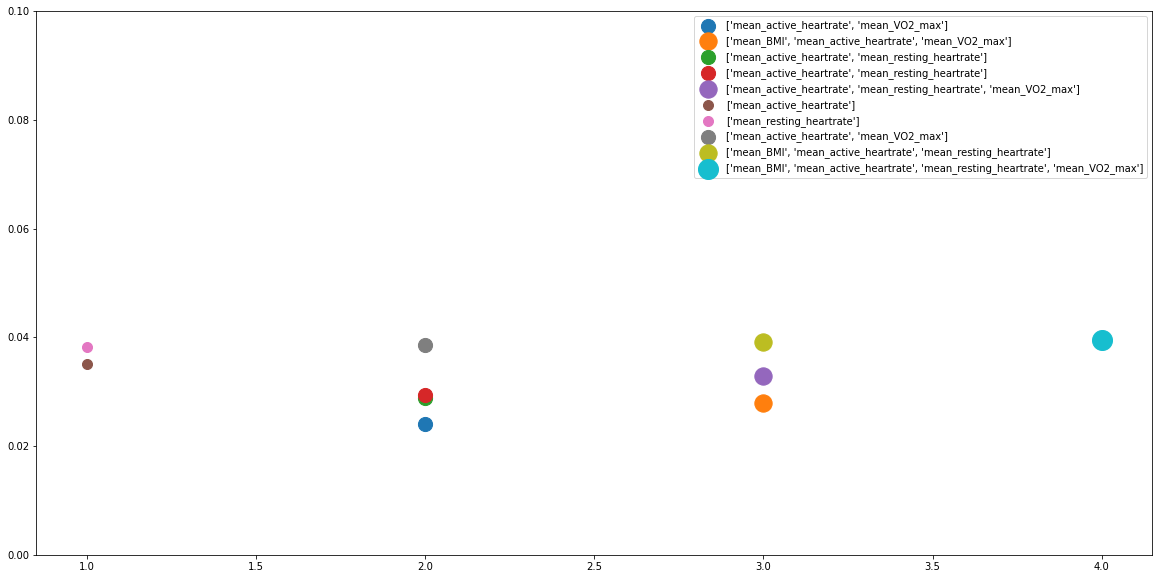

<matplotlib.legend.Legend at 0x7fa0327f5640>

In [0]:
plt.figure(figsize=(20,10))

for _, (_, description, _, _, n_terms, tradeoff) in results.sort_values("tradeoff").head(10).iterrows():
   plt.scatter(n_terms, tradeoff, s=100*n_terms, label=description)
plt.ylim(0, 0.1)
plt.legend()


-sandbox
&copy; 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>